In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import HTML

plt.ioff()

In [7]:
DATA_URL = 'https://gist.githubusercontent.com/chriddyp/cb5392c35661370d95f300086accea51/raw/8e0768211f6b747c0db42a9ce9a0937dafcbd8b2/indicators.csv'

EXPLANATION = """\
<div class="app-sidebar">
<p><em>Compare different development indicators.</em><p>

<p>Select what indicators to plot in the dropdowns, and use the slider
to sub-select a fraction of years to include in the plot.</p>

<p>Data and idea copied from the <a href="https://dash.plot.ly/getting-started-part-2">
Plotly Dash documentation</a>.</p>

<p>This example demonstrates combining matplotlib with Jupyter widgets. For more interactive plots,
consider using <a href="https://github.com/bloomberg/bqplot">bqplot</a>.
</div>
"""

In [8]:
HTML("""\
<style>
.app-subtitle {
    font-size: 1.5em;
}

.app-subtitle a {
    color: #106ba3;
}

.app-subtitle a:hover {
    text-decoration: underline;
}

.app-sidebar p {
    margin-bottom: 1em;
    line-height: 1.7;
}

.app-sidebar a {
    color: #106ba3;
}

.app-sidebar a:hover {
    text-decoration: underline;
}
</style>
""")

In [9]:
class App:
    
    def __init__(self, df):
        self._df = df
        available_indicators = self._df['Indicator Name'].unique()
        self._x_dropdown = self._create_indicator_dropdown(available_indicators, 0)
        self._y_dropdown = self._create_indicator_dropdown(available_indicators, 1)        
        self._plot_container = widgets.Output()
        self._year_slider, year_slider_box = self._create_year_slider(
            min(df['Year']), max(df['Year'])
        )
        _app_container = widgets.VBox([
            widgets.HBox([self._x_dropdown, self._y_dropdown]),
            self._plot_container,
            year_slider_box
        ], layout=widgets.Layout(align_items='center', flex='3 0 auto'))
        self.container = widgets.VBox([
            widgets.HTML(
                (
                    '<h1>Development indicators</h1>'
                    '<h2 class="app-subtitle"><a href="https://github.com/pbugnion/voila-gallery/blob/master/country-indicators/index.ipynb">Link to code</a></h2>'
                ), 
                layout=widgets.Layout(margin='0 0 5em 0')
            ),
            widgets.HBox([
                _app_container, 
                widgets.HTML(EXPLANATION, layout=widgets.Layout(margin='0 0 0 2em'))
            ])
        ], layout=widgets.Layout(flex='1 1 auto', margin='0 auto 0 auto', max_width='1024px'))
        self._update_app()
        
    @classmethod
    def from_url(cls, url):
        df = pd.read_csv(url)
        return cls(df)
        
    def _create_indicator_dropdown(self, indicators, initial_index):
        dropdown = widgets.Dropdown(options=indicators, value=indicators[initial_index])
        dropdown.observe(self._on_change, names=['value'])
        return dropdown
    
    def _create_year_slider(self, min_year, max_year):
        year_slider_label = widgets.Label('Year range: ')
        year_slider = widgets.IntRangeSlider(
            min=min_year, max=max_year,
            layout=widgets.Layout(width='500px')
        )
        year_slider.observe(self._on_change, names=['value'])
        year_slider_box = widgets.HBox([year_slider_label, year_slider])
        return year_slider, year_slider_box
    
    def _create_plot(self, x_indicator, y_indicator, year_range):
        df = self._df[self._df['Year'].between(*year_range)]
        xs = df[df['Indicator Name'] == x_indicator]['Value']
        ys = df[df['Indicator Name'] == y_indicator]['Value']
        plt.figure(figsize=(10, 8))
        plt.xlabel(x_indicator, size=16)
        plt.ylabel(y_indicator, size=16)
        plt.gca().tick_params(axis='both', which='major', labelsize=16)
        plt.plot(xs, ys, 'o', alpha=0.3)
        
    def _on_change(self, _):
        self._update_app()
        
    def _update_app(self):
        x_indicator = self._x_dropdown.value
        y_indicator = self._y_dropdown.value
        year_range = self._year_slider.value
        self._plot_container.clear_output(wait=True)
        with self._plot_container:
            self._create_plot(x_indicator, y_indicator, year_range)
            plt.show()

   Unnamed: 0 Country Name                                     Indicator Name  \
0           0   Arab World                Agriculture, value added (% of GDP)   
1           1   Arab World             CO2 emissions (metric tons per capita)   
2           2   Arab World  Domestic credit provided by financial sector (...   
3           3   Arab World        Electric power consumption (kWh per capita)   
4           4   Arab World       Energy use (kg of oil equivalent per capita)   

   Year  Value  
0  1952    NaN  
1  1952    NaN  
2  1952    NaN  
3  1952    NaN  
4  1952    NaN  


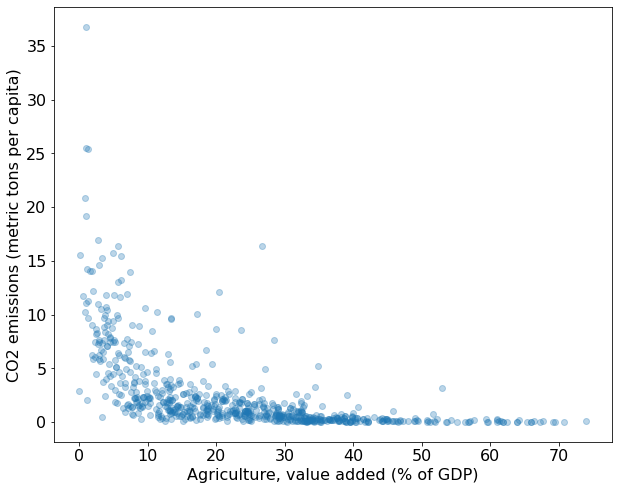

In [10]:
app = App.from_url(DATA_URL)

app.container